In [1]:
#Core
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('CSVs\df_acidentes_sp_moto_CLEAN2.csv',sep=',')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53228 entries, 0 to 53227
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   53228 non-null  int64  
 1   Mes                   53228 non-null  int64  
 2   Dia                   53228 non-null  int64  
 3   Dia da Semana         53228 non-null  object 
 4   Turno                 53228 non-null  object 
 5   Município             53228 non-null  object 
 6   Jurisdição            53228 non-null  object 
 7   Administração         53228 non-null  object 
 8   Conservação           53228 non-null  object 
 9   Latitude              53228 non-null  float64
 10  Longitude             53228 non-null  float64
 11  Condições Climáticas  53228 non-null  object 
 12  Iluminação            53228 non-null  object 
 13  Mão de direção        53228 non-null  object 
 14  Relevo                53228 non-null  object 
 15  Superfície da via  

<AxesSubplot:xlabel='Dia da Semana', ylabel='Acidentes Fatais [%]'>

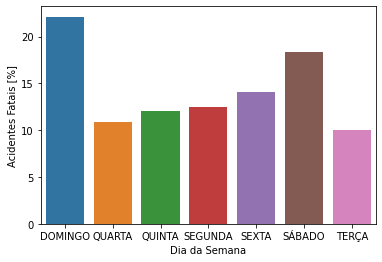

In [19]:
df_g = df.groupby(['Dia da Semana'], as_index=False)['Acidente Fatal'].sum()
df_g['Acidentes Fatais [%]'] = 100*df_g['Acidente Fatal']/df_g['Acidente Fatal'].sum()
sns.barplot(x="Dia da Semana", y="Acidentes Fatais [%]", data=df_g)

In [20]:
df_g

,Dia da Semana,Acidente Fatal,Acidentes Fatais [%]
0,DOMINGO,915,22.122824
1,QUARTA,450,10.880077
2,QUINTA,497,12.016441
3,SEGUNDA,518,12.524178
4,SEXTA,582,14.071567
5,SÁBADO,760,18.375242
6,TERÇA,414,10.009671


In [29]:
df_g2 = df.groupby(['Condições Climáticas'], as_index=False)['Acidente Fatal'].sum()

In [30]:
df_g2

,Condições Climáticas,Acidente Fatal
0,BOM,1831
1,CHUVA,86
2,NEVOEIRO/NEBLINA,5
3,NUBLADO,2214


In [33]:
proporcao = df['Acidente Fatal'].value_counts()[1]/(len(df))
print('Proporção de fatais:', round(proporcao,2)*100, '%')

Proporção de fatais: 8.0 %


<AxesSubplot:xlabel='Dia da Semana', ylabel='Acidente Fatal'>

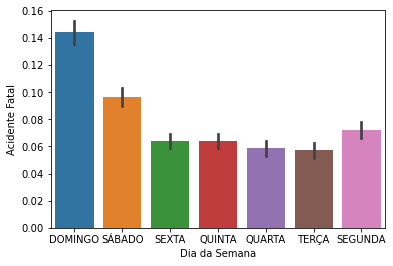

In [34]:
sns.barplot(x="Dia da Semana", y="Acidente Fatal", data=df)

In [36]:
df['Município'].nunique()

39

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53228 entries, 0 to 53227
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   53228 non-null  int64  
 1   Mes                   53228 non-null  int64  
 2   Dia                   53228 non-null  int64  
 3   Dia da Semana         53228 non-null  object 
 4   Turno                 53228 non-null  object 
 5   Município             53228 non-null  object 
 6   Jurisdição            53228 non-null  object 
 7   Administração         53228 non-null  object 
 8   Conservação           53228 non-null  object 
 9   Latitude              53228 non-null  float64
 10  Longitude             53228 non-null  float64
 11  Condições Climáticas  53228 non-null  object 
 12  Iluminação            53228 non-null  object 
 13  Mão de direção        53228 non-null  object 
 14  Relevo                53228 non-null  object 
 15  Superfície da via  

In [65]:
df['Acidente Fatal'].value_counts()

0    49092
1     4136
Name: Acidente Fatal, dtype: int64

In [68]:
df['Acidente Não Fatal'] = df['Acidente Fatal'].apply(lambda x: '0' if x==1 else 1)

In [76]:
df['Acidente Não Fatal'].value_counts()

1    49092
0     4136
Name: Acidente Não Fatal, dtype: int64

In [74]:
df['Acidente Não Fatal'] = df['Acidente Não Fatal'].astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53228 entries, 0 to 53227
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   53228 non-null  int64  
 1   Mes                   53228 non-null  int64  
 2   Dia                   53228 non-null  int64  
 3   Dia da Semana         53228 non-null  object 
 4   Turno                 53228 non-null  object 
 5   Município             53228 non-null  object 
 6   Jurisdição            53228 non-null  object 
 7   Administração         53228 non-null  object 
 8   Conservação           53228 non-null  object 
 9   Latitude              53228 non-null  float64
 10  Longitude             53228 non-null  float64
 11  Condições Climáticas  53228 non-null  object 
 12  Iluminação            53228 non-null  object 
 13  Mão de direção        53228 non-null  object 
 14  Relevo                53228 non-null  object 
 15  Superfície da via  

In [80]:
df_cond = df.groupby(['Condições Climáticas'], as_index=False).sum()
df_cond = df_cond[['Condições Climáticas','Acidente Fatal','Acidente Não Fatal']]
df_cond['Acidentes'] = df_cond['Acidente Fatal']+df_cond['Acidente Não Fatal']
df_cond

,Condições Climáticas,Acidente Fatal,Acidente Não Fatal,Acidentes
0,BOM,1831,44324,46155
1,CHUVA,86,4163,4249
2,NEVOEIRO/NEBLINA,5,242,247
3,NUBLADO,2214,363,2577


In [81]:
df_cond[['Quantidade Acidentes Fatais[%]']] = 100*df_cond['Acidente Fatal']/df_cond['Acidente Fatal'].sum()

df_cond['Quantidade Acidentes [%]'] = 100*df_cond['Acidentes']/df_cond['Acidentes'].sum()

In [82]:
df_cond

,Condições Climáticas,Acidente Fatal,Acidente Não Fatal,Acidentes,Quantidade Acidentes Fatais[%],Quantidade Acidentes [%]
0,BOM,1831,44324,46155,44.269826,86.711881
1,CHUVA,86,4163,4249,2.079304,7.982641
2,NEVOEIRO/NEBLINA,5,242,247,0.120890,0.464041
3,NUBLADO,2214,363,2577,53.529981,4.841437


In [ ]:
# ano

In [96]:
df_ano = df.groupby(['Ano'], as_index=False).sum()
df_ano = df_ano[['Ano','Acidente Fatal','Acidente Não Fatal']]
df_ano['Acidentes'] = df_ano['Acidente Fatal']+df_ano['Acidente Não Fatal']
df_ano = df_ano[['Ano','Acidente Fatal','Acidentes']]

In [97]:
df_ano

,Ano,Acidente Fatal,Acidentes
0,2011,1,1
1,2012,1,1
2,2013,2,2
3,2014,7,7
4,2015,691,691
5,2016,625,625
6,2017,678,678
7,2018,727,727
8,2019,728,24183
9,2020,676,22956


In [101]:
728/365

1.9945205479452055

In [98]:
df_ano_mltd = df_ano.melt(id_vars='Ano')
df_ano_mltd

,Ano,variable,value
0,2011,Acidente Fatal,1
1,2012,Acidente Fatal,1
2,2013,Acidente Fatal,2
3,2014,Acidente Fatal,7
4,2015,Acidente Fatal,691
5,2016,Acidente Fatal,625
6,2017,Acidente Fatal,678
7,2018,Acidente Fatal,727
8,2019,Acidente Fatal,728
9,2020,Acidente Fatal,676


<AxesSubplot:xlabel='Ano', ylabel='value'>

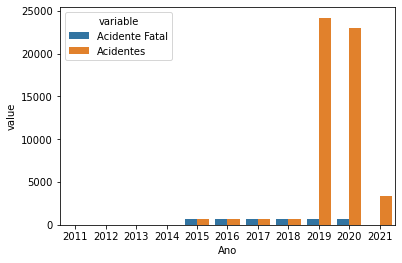

In [99]:
sns.barplot(x='Ano',y='value', hue='variable',data=df_ano_mltd)
